In [1]:
import base_compnal
import openjij as oj
import itertools
import matplotlib.pyplot as plt

In [2]:
N = 20
polynomial_degree = 7
num_sweeps = 1000
num_samples = 100
beta = 100

In [3]:
J = {}
for p in range(polynomial_degree):
    for i in itertools.combinations([i for i in range(N)], p + 1):
        J[i] = p + 1
interaction = [p + 1 for p in range(polynomial_degree)]

In [4]:
model = base_compnal.model.PolynomialIsing(N, interaction, base_compnal.Lattice.INFINIT_RANGE)
solver = base_compnal.solver.ClassicalMonteCarlo(model, base_compnal.Updater.METROPOLIS)
solver.set_num_sweeps(num_sweeps)
solver.set_num_samples(num_samples)
solver.set_inverse_temperature(beta)

In [5]:
solver.run()

In [6]:
res = oj.SASampler().sample_hubo(J, "SPIN", num_sweeps=num_sweeps, num_reads=num_samples, beta_min=beta, beta_max=beta)

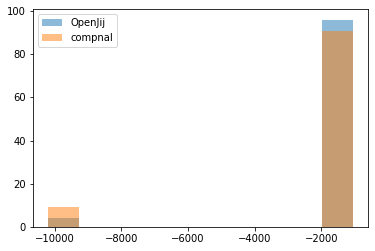

In [7]:
e_min = min(min(res.energies), min(solver.get_energies()))
e_max = max(max(res.energies), max(solver.get_energies()))
plt.hist(res.energies, range=(e_min, e_max), label="OpenJij", alpha=0.5)
plt.hist(solver.get_energies(), range=(e_min, e_max), label="compnal", alpha=0.5)
plt.legend()